<p style="text-align:center;">
  <img src="recursos/imagenes/portada.jpg" style="width: 250px;" />
</p>
<h1 style="text-align: center; font-size: 50px; color:#0C90D2 ;">Con Python, cada desafío tiene su solución.</h1>
<h3 style="text-align: center; font-size: 30px; color:#0C90D2 ;">Generación de mapas usando Folium</h3>

# Contenido:

* [API](#sec1)
* [Práctica](#sec2)
    - [Requsitos](#subsec1)
    - [Importación de librerías](#subsec2)
    - [Configuración](#subsec3)
    - [Consulta básica](#subsec4)
    - [Funciones](#subsec5)
    - [Pokedex](#subsec6)

# Conexión y consulta de datoS por medio de una API

<a class="anchor" id="sec1"></a>
## ¿Qué es una API?

Una API (Application Programming Interface, o Interfaz de Programación de Aplicaciones) es un conjunto de reglas y protocolos que permite que diferentes sistemas o aplicaciones se comuniquen entre sí. Funciona como un intermediario que facilita el intercambio de datos y funcionalidades entre software, sin que los usuarios necesiten conocer los detalles internos de su implementación.

Tipos de API
- APIs Web: Son las más comunes y permiten la comunicación entre aplicaciones a través de internet. Usan protocolos como HTTP y formatos de datos como JSON o XML. Ejemplos:

    * RESTful APIs (REST): Basadas en principios REST (Representational State Transfer).
    * SOAP APIs: Usan XML y un protocolo más rígido.
    GraphQL: Un lenguaje de consulta flexible para APIs.
    * APIs de Sistema: Permiten interactuar con el sistema operativo, como las API de Windows o Linux.
- APIs de Bibliotecas o Frameworks: Ofrecen funciones específicas dentro de un lenguaje de programación, como NumPy en Python o TensorFlow para IA.
- APIs de Hardware: Permiten que el software interactúe con dispositivos físicos, como una API de cámaras o sensores.

<a class="anchor" id="sec2"></a>
## Práctica

El objetivo de nuestra práctica es consumir la API de Pokémon para realizar consultas y extraer información estructurada sobre diversas especies de Pokémon. A través de esta integración, desarrollaremos una Pokédex digital que almacenará y presentará datos relevantes, incluyendo identificadores únicos, nombres, tipos, habilidades, estadísticas base y evoluciones. Para ello, utilizaremos solicitudes HTTP a los endpoints de la API, procesaremos respuestas en formato JSON y aplicaremos técnicas de manipulación de datos para estructurar y visualizar la información de manera eficiente..


<a class="anchor" id="subsec1"></a>
### Requsitos

Antes de iniciar se deben tener en cuenta las siguientes recomendaciones:

* Opcional:
    * Tener python 3, preferible >=3.8
    * Crear un entorno virtual
* Obligatorio:
    * instalar googlemaps y folium:
        * Con conda:
          ```python
          conda install -c conda-forge pandas
          ```      
        * Con pip:
          ```python
          pip install pandas
          ```

<a class="anchor" id="subsec2"></a>
### Importación de librerías

In [1]:
# Importamos librerias
import requests
import json
import pandas as pd
from PIL import Image
from IPython.display import display

<a class="anchor" id="subsec3"></a>
### Configuración

La API que usaremos es [PokeAPI](https://pokeapi.co/), una API RESTful de código abierto y de acceso gratuito, diseñada para proporcionar información detallada sobre el universo Pokémon. Esta API permite realizar consultas eficientes a su base de datos estructurada, obteniendo información en formato JSON sobre especies, habilidades, movimientos, estadísticas y evoluciones. Su arquitectura RESTful facilita la exploración y comprensión de los principios fundamentales de este tipo de API, incluyendo el uso de métodos HTTP, el manejo de endpoints y la manipulación de respuestas en formato estructurado.

Por lo cual, lo primero que debemos establecer es la URL a la que nos conectaremos:

In [2]:
# Url de la api donde realizaremos las consultas
url = "http://pokeapi.co/api//v2/pokemon-form/"

<a class="anchor" id="subsec4"></a>
### Consulta básica

El siguiente bloque de código realiza una consulta a la API, verificando si la conexión se establece correctamente. Si la solicitud HTTP devuelve un código de estado 200 (OK), indicará que la conexión fue exitosa mostrando el mensaje "Conexión exitosa". En caso contrario, se capturará el código de estado de la respuesta y se mostrará un mensaje de error correspondiente, permitiendo identificar posibles fallos en la comunicación con la API.

Por otra parte, el contenido de la respuesta (response) devuelta por la API es de tipo `bytes`, lo que dificulta su interpretación directa. Para mejorar su legibilidad y facilitar su manipulación, utilizamos la biblioteca `json` para convertir el contenido de la respuesta en un diccionario de Python. Esto nos permite acceder de manera estructurada a los datos, facilitando su análisis y procesamiento en el código.

In [3]:
# Realiza la consulta a la API
try:
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error {response.status_code} al consultar la url")
    print("Conexión exitosa")
    data_raw = response.json()
except Exception as e:
    print("Se ha presentado una exepción: \n" + str(e))

Conexión exitosa


Podemos observar que el contenido de la respuesta, almacenado en la variable `data_raw`, es de tipo diccionario, lo que nos permite acceder a sus elementos de manera estructurada. Dentro de este diccionario, los datos de interés se encuentran almacenados en la clave `results`, la cual contiene una lista con la información relevante extraída de la API. 

Note que la información de los nombres de Pokemones viene en grupos de 20.

In [4]:
# Observamos el contenido
data_raw

{'count': 1527,
 'next': 'https://pokeapi.co/api/v2/pokemon-form/?offset=20&limit=20',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon-form/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon-form/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon-form/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon-form/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon-form/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon-form/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon-form/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon-form/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon-form/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon-form/11/'},
  {'name': 'butterfree', 'url': 'htt

<a class="anchor" id="subsec5"></a>
### Funciones

Ahora bien, podemos estructurar nuestro código definiendo un conjunto de funciones reutilizables que nos permitan consultar y extraer información de la API de manera modular y eficiente. Para ello, crearemos una función encargada de realizar la solicitud HTTP y devolver la respuesta (response) de la API y adicionalmente,  permitirá obtener los nombres de los Pokémon en bloques de 20 en 20, facilitando la paginación y navegación a través de la base de datos.

In [5]:
def get_name_pokemon(url="http://pokeapi.co/api//v2/pokemon-form/", offset=0):
    '''
    Obtiene de forma interactiva nombres de pokemones en bloqes de 20.

    Parameters
    ----------
    url : str, optional
        Url de la API. El valor por defecto es: "http://pokeapi.co/api//v2/pokemon-form/".
    offset : int, optional
        Define el valor de paginado. El valor por defecto es: 0.

    Returns
    -------
    function
        Retormna la misma fución en función de la interaación con el usuario
    '''
    args = {"offset": offset} if offset else {}
    try:
        response = requests.get(url, params=args)
        if response.status_code != 200:
            print(f"Error {response.status_code} al consultar la url")
        # print("Conexión exitosa")
        data_raw = response.json()
        results = data_raw.get("results")
        for pokemon in results:
            print(pokemon.get("name", "Desconocido"))
        while True:
            next = input("¿Desea cosultar más pokemones? [Y/N]").lower()
            if next != "y":
                # print("Consulta finalizada")
                break
            offset+=20
            return get_name_pokemon(url, offset)
    except Exception as e:
         print("Se ha presentado una exepción al obtener los datos: \n" + str(e))

Ahora podemos consultar los primeros 40 pokemones.

In [6]:
get_name_pokemon()

bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate


¿Desea cosultar más pokemones? [Y/N] y


spearow
fearow
ekans
arbok
pikachu
raichu
sandshrew
sandslash
nidoran-f
nidorina
nidoqueen
nidoran-m
nidorino
nidoking
clefairy
clefable
vulpix
ninetales
jigglypuff
wigglytuff


¿Desea cosultar más pokemones? [Y/N] n


Ahora es el momento de consultar la información detallada de un Pokémon específico. Para ello, construiremos una función que reciba como argumento el nombre del Pokémon y realice una solicitud a la API para obtener sus características. Esta función nos permitirá extraer datos relevantes, como su tipo, estadísticas base, habilidades y más, facilitando así el acceso a información detallada de cada Pokémon.

In [7]:
def get_pokemon(url="http://pokeapi.co/api//v2/pokemon/", pokemon="pikachu"):
    '''
    Obtiene la información o características del pokemon.
    
    Parameters
    ----------
    url : str, optional
        Url de la API. El valor por defecto es: "http://pokeapi.co/api//v2/pokemon-form/".
    pokemon : str
        Nombre del pokemon a consultar. El valor por defecto es: "pikachu".

    Returns
    -------
    data_raw : dict
        Diccionario con la información el pokemon.
    '''
    # Definimos la url del pokemon a consultar
    url += pokemon
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error {response.status_code} al consultar la url")
        # print("Conexión exitosa")
        data_raw = response.json()
        return data_raw
    except Exception as e:
        print(f"Se ha presentado una exepción al obtner los datos  de {pokemon}: \n" + str(e))

Es importante destacar que la información obtenida sobre las características del Pokémon es bastante extensa, ya que la API proporciona una gran cantidad de datos detallados. Sin embargo, este resultado es un excelente ejemplo de cómo podemos interactuar con una API para extraer información estructurada y aprovecharla según nuestras necesidades. 

In [8]:
# Deatalle de la informacion del pokemon
# get_pokemon(pokemon="pikachu")

<a class="anchor" id="subsec6"></a>
### Pokedex

Después de haber explorado la información obtenida de la API, es momento de construir nuestra Pokédex, la cual nos permitirá visualizar de forma resumida algunas de las características más relevantes de cada Pokémon, incluyendo su nombre, ID, altura, peso, tipo y habilidades. Además, incorporaremos la opción de obtener y mostrar una imagen representativa del Pokémon.

Para lograrlo, desarrollaremos dos funciones especializadas:

- Una función para extraer y estructurar la información clave del Pokémon.
- Otra función para obtener y mostrar su imagen.


In [9]:
def image_pokemon(id, pokemon, url="http://pokeapi.co/api//v2/pokemon/"):
    '''
    Obtiene el sprites o imagen del pokemon.

    Parameters
    ----------
    id : int
        Identificador del pokemon.
    pokemon : str
        Nombre del pokemon a consultar.
    url : str, optional
        Url de la API. El valor por defecto es: "http://pokeapi.co/api//v2/pokemon-form/".

    Returns
    -------
    None.
    '''
    url += str(id)
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error {response.status_code} al consultar la url")
        # print("Conexión exitosa")
        data_raw = response.json()
        url_image = data_raw["sprites"]["front_default"]
        response_image = requests.get(url_image, stream=True)
        nombre_pokemon = pokemon + ".png"
        with open(nombre_pokemon, "wb") as file:
            # Descarga el contenido poco a poco
            for chunk in response_image.iter_content():
                # Escribe el archivo
                file.write(chunk)
        response_image.close()
        # Muestra la imagen
        display(Image.open(nombre_pokemon).convert('RGB'))
    except Exception as e:
        print("Se ha presentado una exepción al obtener la imagen: \n" + str(e))

In [10]:
def pokedex(url="http://pokeapi.co/api//v2/pokemon/", pokemon="pikachu"):
    '''
    Obtiene los datos relevantes del pokemon. Usa la función image_pokemon
    para obtener la imagen de este.

    Parameters
    ----------
    url : str, optional
        Url de la API. El valor por defecto es: "http://pokeapi.co/api//v2/pokemon-form/".
    pokemon : str, optional
        Nombre del pokemon a consultar. El valor por defecto es: "pikachu".

    Returns
    -------
    DataFrame
        DataFrame con la información del pokemon.
    '''
    # Definimos la url del pokemon a consultar
    url += pokemon.lower()
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error {response.status_code} al consultar la url")
        # print("Conexión exitosa")
        data_raw = response.json()
        # Obtiene los datos
        name = data_raw.get("name")
        id = data_raw.get("id")
        height = data_raw.get("height")/10 # metros
        weight = data_raw.get("weight")/10 # kg
        type = data_raw["types"][0]["type"]["name"]
        # Concatena las habilidades
        conteo = len(data_raw["abilities"])
        habilidad = [data_raw["abilities"][i]["ability"]["name"] for i in range(conteo)]
        habilidades = ", ".join(habilidad)
        # Crea de un dataframe
        datos = {"Datos": [name, id, height, weight, type, habilidades]}
        index = ["Nombre", "Id", "Altura", "Peso", "Tipo", "Habilidades"]
        # Obtiene la imagen
        image_pokemon(id, pokemon)
        return pd.DataFrame(data=datos, index=index)
    except Exception as e:
        print(f"Se ha presentado una exepción al obtner los datos  de {pokemon}: \n" + str(e))     

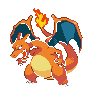

,Datos
Nombre,charizard
Id,6
Altura,1.7
Peso,90.5
Tipo,fire
Habilidades,"blaze, solar-power"


In [11]:
pokedex(pokemon="charizard")